In [1]:
import matplotlib.pyplot as plt

C:\Users\purey.rp\AppData\Local\Temp\ipykernel_20784\2978466137.py:24: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  figure.canvas.set_window_title('SI model')
C:\Users\purey.rp\AppData\Local\Temp\ipykernel_20784\2978466137.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])


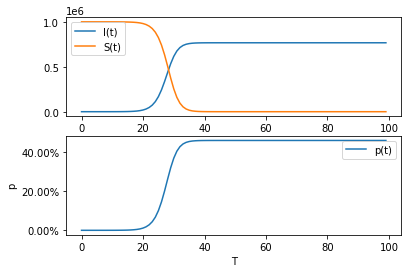

In [4]:
N = 1000000
S = N - 1
I = 1
beta = 0.6

sus = [] # infected compartment
inf = [] # susceptible compartment
prob = [] # probability of infection at time t

def si_model(S, I, N):
    t = 0
    while (t < 100):
        S = S - beta * ((S * I / N))
        I = I + beta * ((S * I) / N)
        p = beta * (I / N)

        sus.append(S)
        inf.append(I)
        prob.append(p)
        t = t + 1

si_model(S, I, N)
figure = plt.figure()
figure.canvas.set_window_title('SI model')

figure.add_subplot(211)
inf_line, =plt.plot(inf, label='I(t)')

sus_line, = plt.plot(sus, label='S(t)')
plt.legend(handles=[inf_line, sus_line])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

ax = figure.add_subplot(212)
prob_line = plt.plot(prob, label='p(t)')
plt.legend(handles=prob_line)

type(ax)  # matplotlib.axes._subplots.AxesSubplot

# manipulate
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

plt.xlabel('T')
plt.ylabel('p')

plt.show()

In [2]:
!pip install ndlib

  Created wheel for python-igraph: filename=python_igraph-0.10.1-py3-none-any.whl size=9076 sha256=1e4a484c3a30d96c9a666307b180b30c1cd5166495ee88b72399e05bff0c0484
  Stored in directory: c:\users\rpure\appdata\local\pip\cache\wheels\f6\e6\41\2944e1bc6ace9a9191295cbc79e512faeec454c0178d073876
Successfully built python-igraph


In [3]:
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import datetime

In [10]:
# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = ep.SIModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)

In [20]:
df = pd.read_csv('US_airways_2008.csv', sep=';')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232109 entries, 0 to 232108
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Origin_airport          232109 non-null  object 
 1   Destination_airport     232109 non-null  object 
 2   Origin_city             232109 non-null  object 
 3   Destination_city        232109 non-null  object 
 4   Passengers              232109 non-null  int64  
 5   Seats                   232109 non-null  int64  
 6   Flights                 232109 non-null  int64  
 7   Distance                232109 non-null  int64  
 8   Fly_date                232109 non-null  object 
 9   Origin_population       232109 non-null  int64  
 10  Destination_population  232109 non-null  int64  
 11  Org_airport_lat         231442 non-null  float64
 12  Org_airport_long        231442 non-null  float64
 13  Dest_airport_lat        231474 non-null  float64
 14  Dest_airport_long   

In [22]:
df.head()

Origin_airport Destination_airport    Origin_city Destination_city  \
0            MHK                 AMW  Manhattan, KS         Ames, IA   
1            SEA                 RDM    Seattle, WA         Bend, OR   
2            SEA                 RDM    Seattle, WA         Bend, OR   
3            SEA                 RDM    Seattle, WA         Bend, OR   
4            GEG                 RDM    Spokane, WA         Bend, OR   

   Passengers  Seats  Flights  Distance    Fly_date  Origin_population  \
0          21     30        1       254  01.10.2008             122049   
1         126    148        4       228  01.11.2008            6713274   
2          61     70        1       228  01.11.2008            6713274   
3         666   1073       29       228  01.02.2008            6713274   
4          13     30        1       291  01.02.2008             462408   

   Destination_population  Org_airport_lat  Org_airport_long  \
0                   86219        39.140999        -96.670799   
1                  157730        47.449001       -122.308998   
2                  157730        47.449001       -122.308998   
3                  157730        47.449001       -122.308998   
4                  157730        47.619900       -117.533997   

   Dest_airport_lat  Dest_airport_long  
0               NaN                NaN  
1         44.254101        -121.150002  
2         44.254101        -121.150002  
3         44.254101        -121.150002  
4         44.254101        -121.150002

In [23]:
df.isnull().sum()

Origin_airport              0
Destination_airport         0
Origin_city                 0
Destination_city            0
Passengers                  0
Seats                       0
Flights                     0
Distance                    0
Fly_date                    0
Origin_population           0
Destination_population      0
Org_airport_lat           667
Org_airport_long          667
Dest_airport_lat          635
Dest_airport_long         635
dtype: int64

In [24]:
df.shape

(232109, 15)

In [25]:
df.dropna(inplace=True)

In [26]:
for i, j in df['Fly_date'].iteritems():
    df.loc[i, ('Fly_date')] = (datetime.datetime.strptime(j, "%d.%m.%Y").date() - datetime.date(2008, 1, 1)).days 

In [29]:
df['Fly_date'].astype(int)

1         305
2         305
3          31
4          31
5         213
         ... 
232104    213
232105    335
232106    182
232107    244
232108    305
Name: Fly_date, Length: 230938, dtype: int32

In [33]:
df = df.sort_values(by=['Fly_date'])
df = df.reset_index(drop=True)

In [35]:
df['Infected_score'] = 0.0
df['Infected'] = 0

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230938 entries, 0 to 230937
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Origin_airport          230938 non-null  object 
 1   Destination_airport     230938 non-null  object 
 2   Origin_city             230938 non-null  object 
 3   Destination_city        230938 non-null  object 
 4   Passengers              230938 non-null  int64  
 5   Seats                   230938 non-null  int64  
 6   Flights                 230938 non-null  int64  
 7   Distance                230938 non-null  int64  
 8   Fly_date                230938 non-null  object 
 9   Origin_population       230938 non-null  int64  
 10  Destination_population  230938 non-null  int64  
 11  Org_airport_lat         230938 non-null  float64
 12  Org_airport_long        230938 non-null  float64
 13  Dest_airport_lat        230938 non-null  float64
 14  Dest_airport_long   

In [62]:
G = nx.from_pandas_edgelist(df, 
                            source = 'Origin_city', 
                            target = 'Destination_city', 
                            edge_attr = 'Flights')
# ,
#                             create_using = nx.DiGraph()

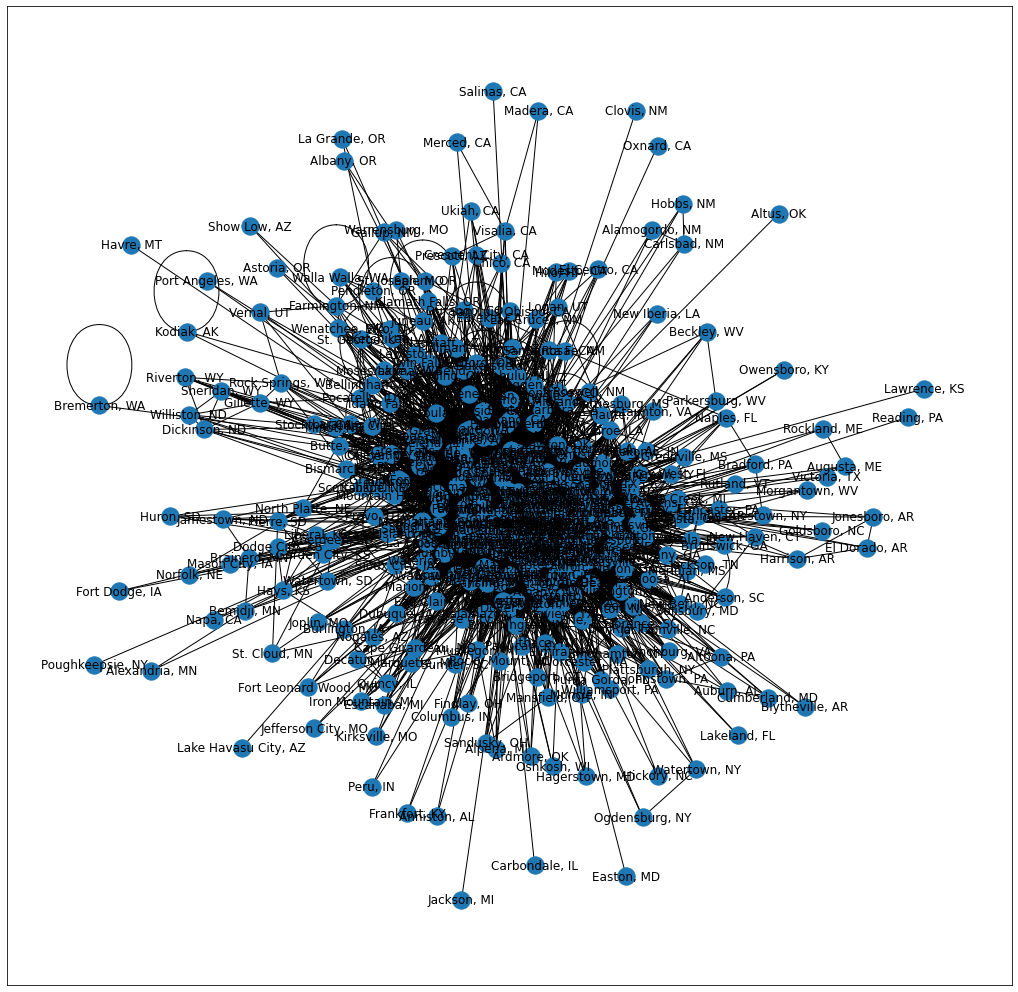

In [55]:
plt.figure(figsize = (18,18))
nx.draw_networkx(G)
plt.show()

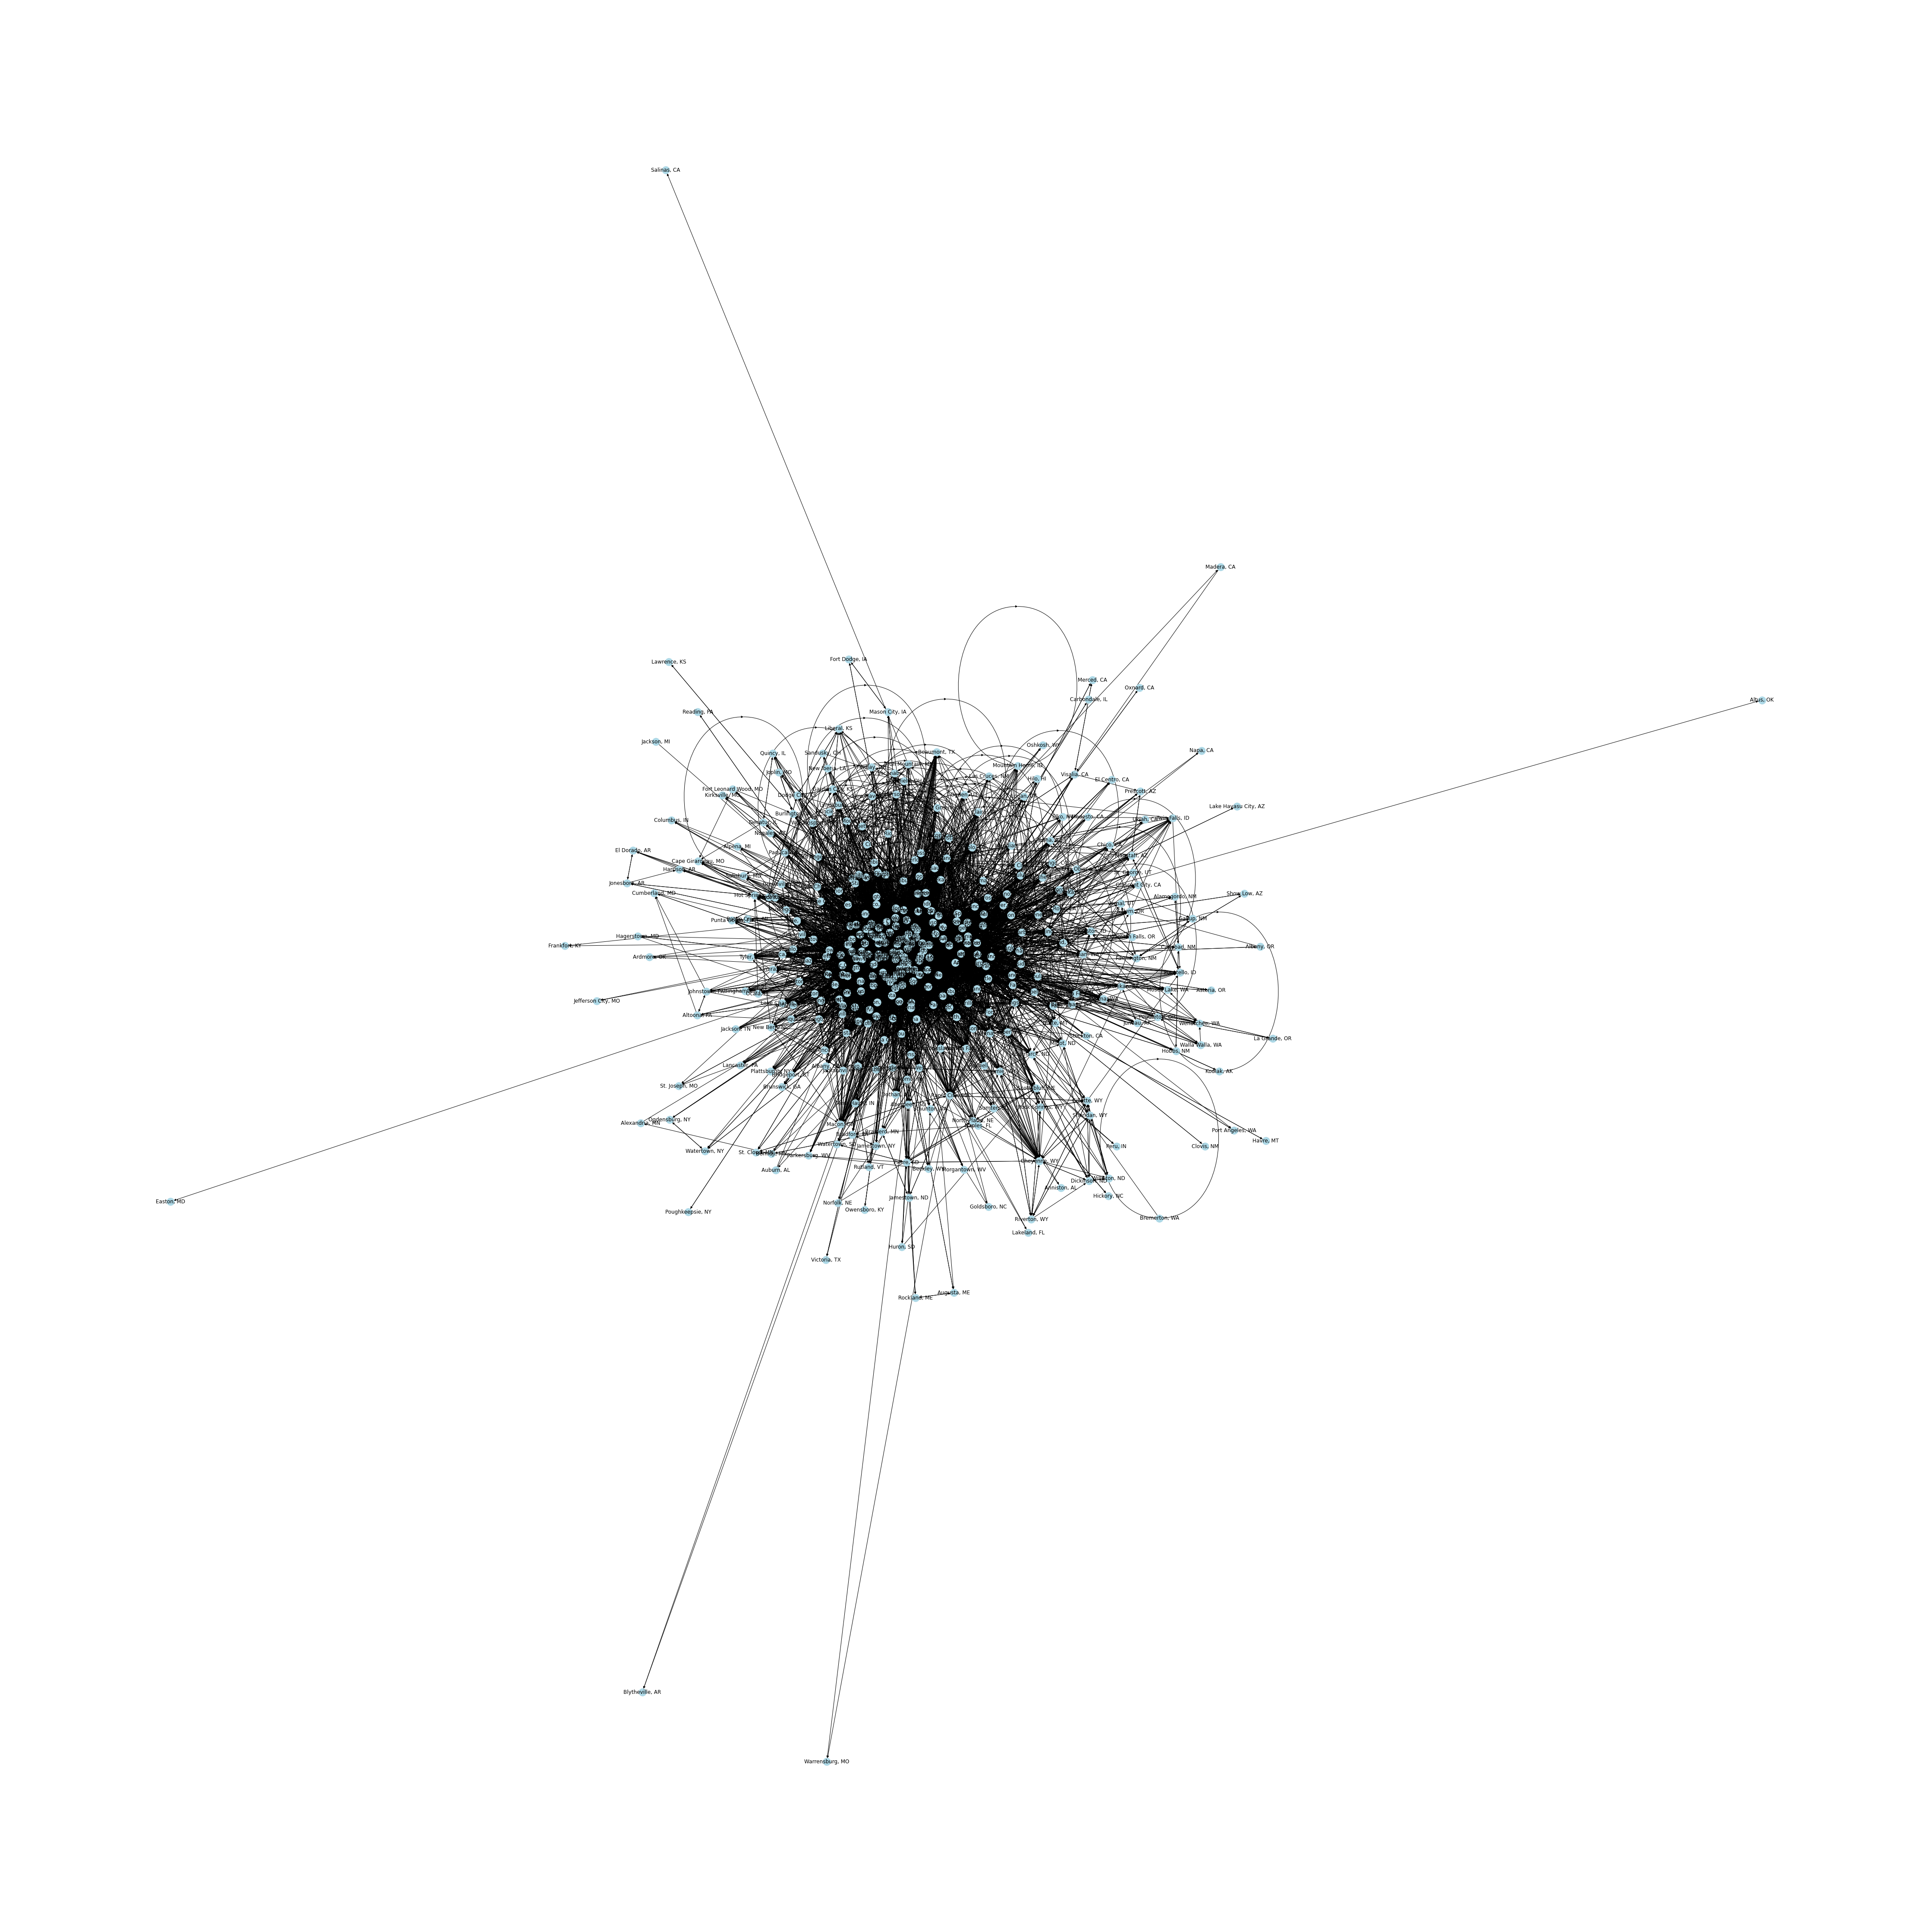

In [48]:
plt.figure(figsize = (62,62))
pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))
d = dict(G.degree)
nx.draw(G, pos, node_color='lightblue', 
        with_labels=True, 
        nodelist=d)

In [63]:
G.edges(data=True)

EdgeDataView([('Seattle, WA', 'Bend, OR', {'Flights': 1}), ('Seattle, WA', 'Reno, NV', {'Flights': 1}), ('Seattle, WA', 'Butte, MT', {'Flights': 2}), ('Seattle, WA', 'Fargo, ND', {'Flights': 1}), ('Seattle, WA', 'Miami, FL', {'Flights': 30}), ('Seattle, WA', 'Omaha, NE', {'Flights': 1}), ('Seattle, WA', 'Provo, UT', {'Flights': 1}), ('Seattle, WA', 'Tampa, FL', {'Flights': 1}), ('Seattle, WA', 'Austin, TX', {'Flights': 23}), ('Seattle, WA', 'Boston, MA', {'Flights': 30}), ('Seattle, WA', 'Dallas, TX', {'Flights': 32}), ('Seattle, WA', 'Eugene, OR', {'Flights': 117}), ('Seattle, WA', 'Fresno, CA', {'Flights': 53}), ('Seattle, WA', 'Helena, MT', {'Flights': 31}), ('Seattle, WA', 'Juneau, AK', {'Flights': 18}), ('Seattle, WA', 'Newark, NJ', {'Flights': 89}), ('Seattle, WA', 'Peoria, IL', {'Flights': 1}), ('Seattle, WA', 'Pueblo, CO', {'Flights': 1}), ('Seattle, WA', 'Tacoma, WA', {'Flights': 1}), ('Seattle, WA', 'Toledo, OH', {'Flights': 4}), ('Seattle, WA', 'Tucson, AZ', {'Flights': 26})

In [52]:
pos=nx.get_node_attributes(G,'pos')

In [53]:
pos

{}